# Observations and Insights 

In [ ]:
Observation of the Analysis: 
1. According to our pie chart, there is an equal and even distribution of the population of female mice and male mice across the entire study.
2. The drug regimens that proved to be most effective at tumor reduction were capomulin and ramicane with the lowest tumor volume in the entire regimen.
3. Also a correlation coefficient of 0.84 indicates a strong relationship between mouse weight and tumor volume.

# Libraries, reading and merging of datasets

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results,
                                 how='left', on='Mouse ID')


# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [52]:
# Explore number of mice

mice_count = len(combined_data["Mouse ID"].unique())
print(f"Number of mice in the raw dataset: {mice_count}")

Number of mice in the raw dataset: 249


# Cleaning the data

In [46]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_miceID = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
print(f"Duplicate Mice ID: {duplicate_miceID}")

Duplicate Mice ID: ['g989']


In [47]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [48]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data = combined_data[combined_data.duplicated(['Mouse ID'])]
duplicate_data                           

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = combined_data.drop_duplicates(['Mouse ID', 'Timepoint'])
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [51]:
# Checking the number of mice in the clean DataFrame.

clean_mice=len(clean_data["Mouse ID"].value_counts())

print(f"Number of mice in the clean dataset: {clean_mice}")

Number of mice in the clean dataset: 249


# Exploratory Data Analysis

## Univariate variable exploration.

In [8]:
# Explore drug regimens
drug_regimen_list = combined_data["Drug Regimen"].unique()
drug_regimen_list

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [9]:
drug_regimen_count = len(drug_regimen_list)
print(f"There were {drug_regimen_count} drug regimens (Ramicane, Capomulin, Infubinol, Placebo, Ceftamin, Stelasyn, Zoniferol, Ketapril, Propriva, Naftisol) administered to these {mice_count} mice.")

There were 10 drug regimens (Ramicane, Capomulin, Infubinol, Placebo, Ceftamin, Stelasyn, Zoniferol, Ketapril, Propriva, Naftisol) administered to these 249 mice.


In [35]:
# Summary statistics for Weight and Age of the mice
mouse_metadata[["Weight (g)", "Age_months"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Weight (g),249.0,26.116466,3.697003,15.0,25.0,27.0,29.0,30.0
Age_months,249.0,12.730924,7.228687,1.0,6.0,13.0,19.0,24.0


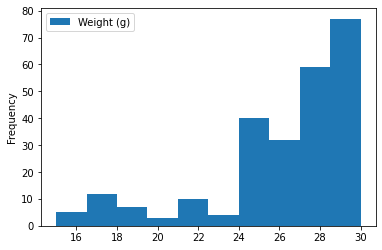

In [29]:
# Explore weight of mice
mouse_metadata[["Weight (g)"]].plot(kind="hist");

Majority of the mice weighed 24g or above. On average, a mice weighs 26.12g. The lightest mice weighs 15g and the heaviest weighs 30g.

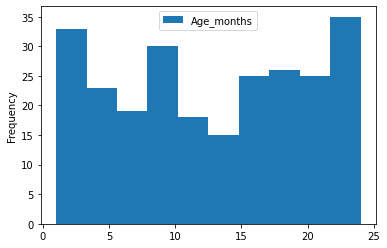

In [30]:
# Explore age of mice
mouse_metadata[["Age_months"]].plot(kind="hist");

The youngest mouse was a month old and the oldest was 2 years old. A typical mouse on the average was about a year old.

<AxesSubplot:xlabel='Timepoint'>

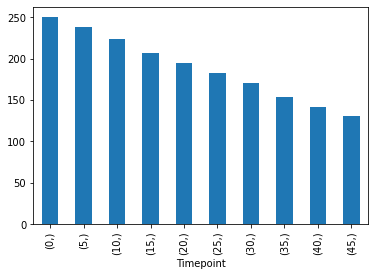

In [28]:
study_results[["Timepoint"]].value_counts().plot(kind = "bar")

Tumor development was measured over the course of 45 days in 5 days intervals. The output above show that some of the mice dropped out at the end of 45 days. This is why we observe only 130 tumor development measures on the 45th day.

<AxesSubplot:ylabel='Metastatic Sites'>

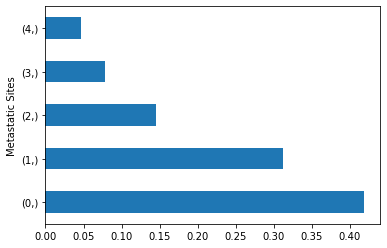

In [26]:
study_results[["Metastatic Sites"]].value_counts(normalize=True).plot(kind = "barh")

Tumor development measures were collected in 5 metastatic sites. 41.9%, 31.2%, 14.5%, 7.8% and 4.6% of the measurements were collected in Sites 0, 1, 2, 3, and 4 respectively.

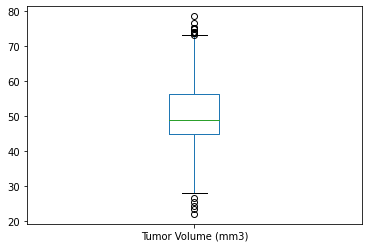

In [42]:
# Explore tumor volume
study_results[["Tumor Volume (mm3)"]].plot(kind="box");

Tumor volume seem to be normally distributed with the median tumor value being 50 $mm^3$

## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_deviation = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

summary_df=pd.DataFrame({"Mean":mean, "Median":median,"Variance":variance,"Standard Deviation":standard_deviation,"SEM":sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_df = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
aggregate_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

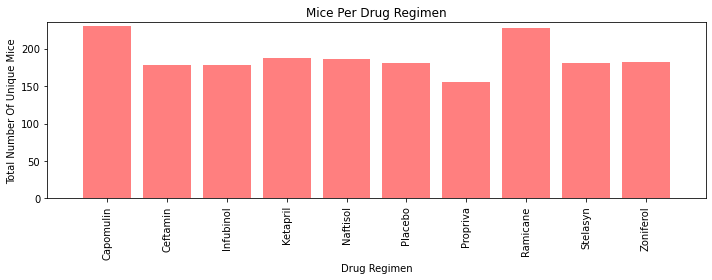

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
unique_df = pd.DataFrame(clean_data.groupby("Drug Regimen")["Mouse ID"].count().reset_index())
#unique_df.head(10)
unique_mice = unique_df["Mouse ID"]
unique_mice

#  Set x axis and tick locations
x_axis = np.arange(len(unique_mice))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,4))
plt.bar(x_axis, unique_mice, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, unique_df["Drug Regimen"], rotation="vertical")

# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(unique_mice)+5)

# Set a Title and labels
plt.title("Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number Of Unique Mice")

# Show the graph
plt.tight_layout()
plt.show()


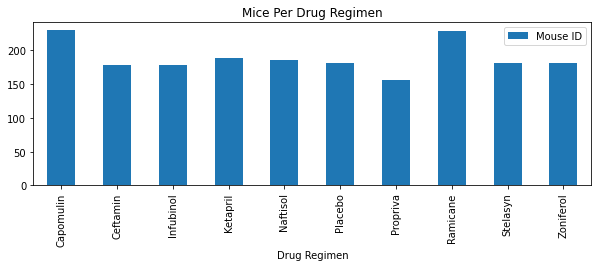

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
unique_df = pd.DataFrame(clean_data.groupby("Drug Regimen")["Mouse ID"].count().reset_index())
unique_df.head(50)
#drug_regimen = unique_df.index.tolist()
#unique_mice = (combined_data.groupby("Drug Regimen")["Mouse ID"].nunique()).tolist()

unique_df=unique_df.set_index("Drug Regimen")

#  Set x axis and tick locations
x_axis = np.arange(len(unique_mice))

unique_df.plot(kind="bar", figsize=(10,3))

# Set a title for the chart
plt.title("Mice Per Drug Regimen")

plt.show()
plt.tight_layout()


([<matplotlib.patches.Wedge at 0x26c1b6b6850>,
 [Text(-0.7925485910066415, -0.9010364758950591, 'Females'),
  Text(0.7265029524204479, 0.8259500348836922, 'Males')],
 [Text(-0.4623200114205409, -0.5256046109387844, '49.3%'),
  Text(0.39627433768388065, 0.4505182008456502, '50.7%')])

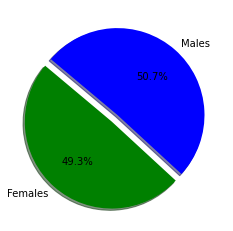

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_data.groupby("Sex")["Mouse ID"].count().tolist()
gender_count

# Labels for the sections of our pie chart
labels = ["Females", "Males"]

# The colors of each section of the pie chart
colors = ["green", "blue"]

# Tells matplotlib to seperate the Females from Males
explode = (0.1, 0)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

<AxesSubplot:ylabel='Mouse ID'>

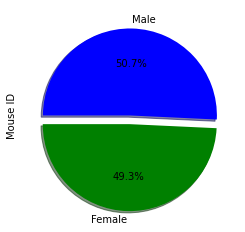

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df = pd.DataFrame(clean_data.groupby("Sex")["Mouse ID"].count()).reset_index()
gender_df

# plot chart
plt.figure(figsize=(10,4))
ax1 = plt.subplot( aspect='equal')
gender_df.plot(kind='pie',y = "Mouse ID", ax=ax1, autopct='%1.1f%%', 
 startangle=180, shadow=True, labels=gender_df["Sex"],explode = (0.1, 0),colors = colors, legend = False)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
sorted_data = clean_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
sorted_data.head()

# Select final volume of each mouse 
final_volume = sorted_data.loc[sorted_data["Timepoint"] == 45]
final_volume.head()

# Select data for Capomulin regimen 
cap_data = final_volume[final_volume['Drug Regimen'].isin(['Capomulin'])]
cap_data.head()

ram_data = final_volume[final_volume['Drug Regimen'].isin(['Ramicane'])]
ram_data.head()

inf_data = final_volume[final_volume['Drug Regimen'].isin(['Infubinol'])]
inf_data.head()

cef_data = final_volume[final_volume['Drug Regimen'].isin(['Ceftamin'])]
cef_data.head()



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
493,a275,Ceftamin,Female,20,28,45,62.999356,3
993,j296,Ceftamin,Female,24,30,45,61.849023,3
1033,k210,Ceftamin,Male,15,28,45,68.923185,3
1112,l471,Ceftamin,Female,7,28,45,67.748662,1
1132,l661,Ceftamin,Male,18,26,45,59.851956,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
cap_list = cap_data.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]
cap_list

ram_list = ram_data.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_list = ram_list["Tumor Volume (mm3)"]
ram_list

inf_list = inf_data.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
inf_list = inf_list["Tumor Volume (mm3)"]
inf_list

cef_list = cef_data.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_list = cef_list["Tumor Volume (mm3)"]
cef_list



# Calculate the IQR and quantitatively determine if there are any potential outliers.
# IQR for Capomulin
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of capomulin is: {lowerq}")
print(f"The upper quartile of capomulin is: {upperq}")
print(f"The interquartile range of capomulin is: {iqr}")
print(f"The the median of capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



    
   

The lower quartile of capomulin is: 32.37735684
The upper quartile of capomulin is: 40.1592203
The interquartile range of capomulin is: 7.781863460000004
The the median of capomulin is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [15]:
quartiles = ram_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of ramicane is: {lowerq}")
print(f"The upper quartile of ramicane is: {upperq}")
print(f"The interquartile range of ramicane is: {iqr}")
print(f"The the median of ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of ramicane is: 30.981175225
The upper quartile of ramicane is: 38.5083053075
The interquartile range of ramicane is: 7.527130082500001
The the median of ramicane is: 34.848627300000004 
Values below 19.69048010125 could be outliers.
Values above 49.79900043125001 could be outliers.


In [16]:
quartiles = inf_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of infubinol is: {lowerq}")
print(f"The upper quartile of infubinol is: {upperq}")
print(f"The interquartile range of infubinol is: {iqr}")
print(f"The the median of infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of infubinol is: 62.75445141
The upper quartile of infubinol is: 67.68556862
The interquartile range of infubinol is: 4.9311172099999965
The the median of infubinol is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


In [17]:
quartiles = cef_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of ceftamin is: {lowerq}")
print(f"The upper quartile of ceftamin is: {upperq}")
print(f"The interquartile range of ceftamin is: {iqr}")
print(f"The the median of ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of ceftamin is: 61.43389223
The upper quartile of ceftamin is: 67.52748237
The interquartile range of ceftamin is: 6.093590140000003
The the median of ceftamin is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


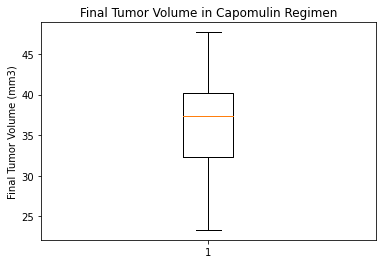

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Box plot for Capomulin
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()


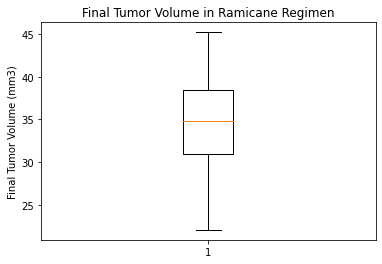

In [19]:
# Box plot for Ramicane
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ram_list)
plt.show()


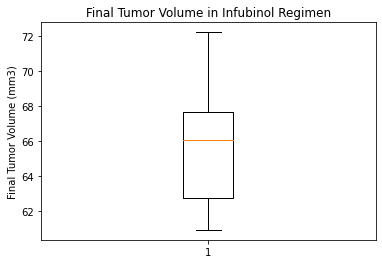

In [20]:
# Box plot for Infubinol
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Infubinol Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(inf_list)
plt.show()


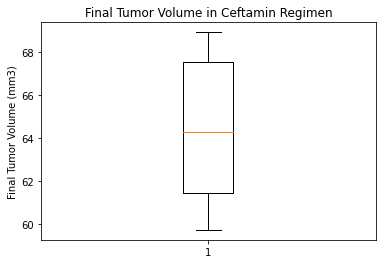

In [21]:
# Box plot for Ceftamin
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cef_list)
plt.show()


## Line and Scatter Plots

[]

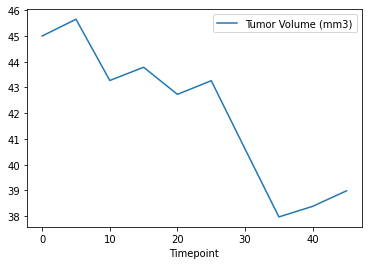

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

# Select data of a single mouse
cap_single = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128"]
cap_single
cap_single = cap_single.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
cap_single.plot("Timepoint").plot(figsize=(10, 8), linewidth=2.5, color="blue")

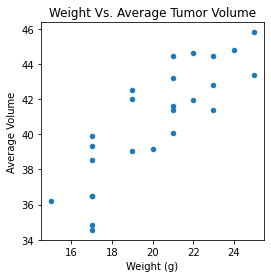

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_cap = pd.DataFrame(capomulin_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap.head()
average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_cap.head()

average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=False, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 


# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = average_cap.iloc[:,1]
avg_tumor_volume = average_cap.iloc[:,2]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


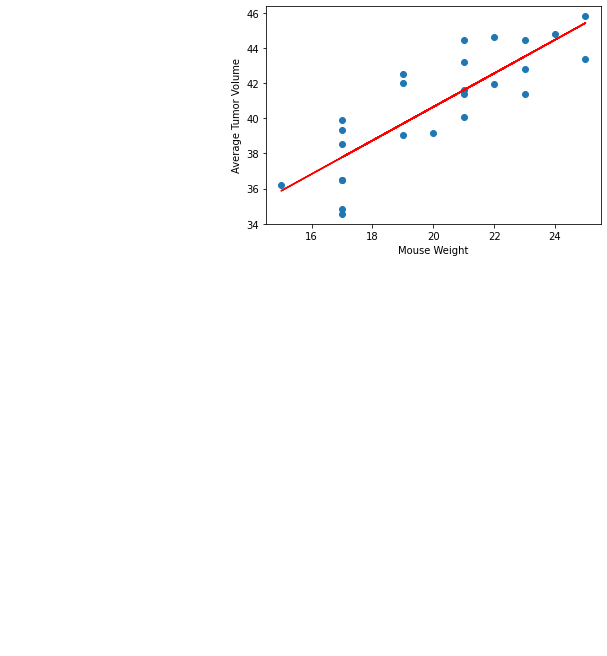

In [25]:
x_values = average_cap['Weight (g)']
y_values = average_cap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()